Data Cleaning & Preprocessing

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
data info: None

Missing values before cleaning: PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin

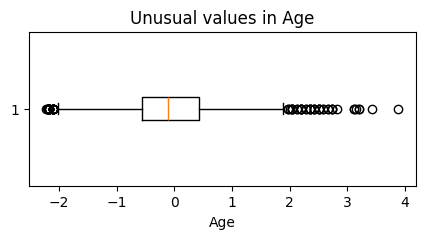

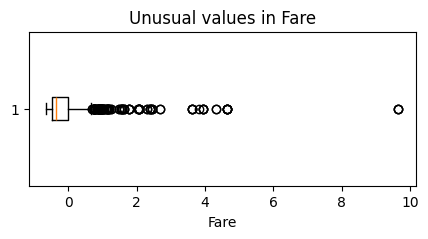

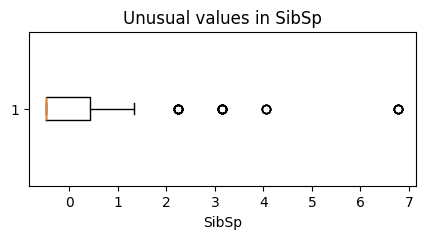

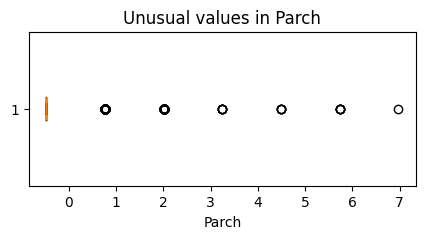


Data size after removing extremes: (577, 9)


In [2]:
# import Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# load dataset
titanic = pd.read_csv('c:/Users/LENOVO/Documents/Titanic-Dataset.csv')

print("data info:",titanic.info())
print("\nMissing values before cleaning:",titanic.isnull().sum())
# Fill missing ages with the middle value (median)
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
# Fill missing embarkation points 
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])
titanic = titanic.drop(columns='Cabin')
print("\nMissing values after cleaning:",titanic.isnull().sum())
# Make text data numerical
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked'], drop_first=True)
# Remove columns we won't use
titanic = titanic.drop(columns=['Name', 'Ticket', 'PassengerId'])
print("\ncolumns after conversion:",titanic.columns)
number_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
titanic[number_cols] = scaler.fit_transform(titanic[number_cols])
print("\nSample of scaled numbers:",titanic[number_cols].head())
# Show boxplots to visualize unusual values
for col in number_cols:
    plt.figure(figsize=(5, 2))
    plt.boxplot(titanic[col], vert=False)
    plt.title(f'Unusual values in {col}')
    plt.xlabel(col)
    plt.show()
clean_titanic = titanic.copy()
# using inter quartile range 
for col in number_cols:
    # Calculate range boundaries
    Q1 = clean_titanic[col].quantile(0.25)
    Q3 = clean_titanic[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    clean_titanic = clean_titanic[(clean_titanic[col] >= lower_bound) & (clean_titanic[col] <= upper_bound)]
print(f"\nData size after removing extremes: {clean_titanic.shape}")